In [1]:
#my-login: jdswift
#partner-login: npkruse
import pandas as pd
import requests,json,sqlite3

In [2]:
#q1
def population(URL):
    df = pd.read_json(URL)
    population = sum(df['population'])
    return population
population("https://tyler.caraza-harter.com/cs301/fall18/data/countries.json")


6279556636

In [3]:
#q2
request = requests.get("https://tyler.caraza-harter.com/cs301/fall18/data/capitals.txt")
text = request.text.splitlines()
text[0]

'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/ElSalvador.json'

In [4]:
list_capital_data = []
for i in text:
    data = requests.get(i)
    capital_json = data.json()
    list_capital_data.append(capital_json)
dataframe = pd.DataFrame(list_capital_data)
dataframe

,capital,country,latitude,longitude
0,San Salvador,El Salvador,13.700000,-89.200000
1,Sofia,Bulgaria,42.683333,23.316667
2,Guatemala City,Guatemala,14.616667,-90.516667
3,Rabat,Morocco,34.016667,-6.816667
4,Brussels,Belgium,50.833333,4.333333
5,Ankara,Turkey,39.933333,32.866667
6,Wellington,New Zealand,-41.300000,174.783333
7,George Town,Cayman Islands,19.300000,-81.383333
8,Tripoli,Libya,32.883333,13.166667
9,Nuku'alofa,Tonga,-21.133333,-175.200000


In [5]:
#q3
dataframe['country'] == 'China'
China = dataframe[dataframe['country'] == 'China']
China['capital'].item()

'Beijing'

In [6]:
#q4
newdf = dataframe.sort_values(by='latitude')
countries = newdf.head()
newlist = list(countries['country'])
json.dumps(newlist)

'["New Zealand", "Australia", "Uruguay", "Argentina", "Chile"]'

In [7]:
#q5
newdf = dataframe.sort_values(by='latitude', ascending=False)
countries = newdf.head(3)
newlist = list(countries['country'])
json.dumps(newlist)

'["Iceland", "Finland", "Norway"]'

In [8]:
#q6
country_data = pd.read_json("https://tyler.caraza-harter.com/cs301/fall18/data/countries.json")
stats = country_data[['birth-rate', 'death-rate']]
stats.describe()

,birth-rate,death-rate
count,175.000000,175.000000
mean,22.536114,9.654971
std,11.287090,5.187216
min,8.250000,2.410000
25%,12.635000,6.075000
50%,20.340000,8.230000
75%,30.200000,11.965000
max,50.730000,29.740000


In [9]:
#q7
country_data['phones'] = country_data['phones'].str.replace(',', '.').astype(float)
country_data['literacy'] = country_data['literacy'].str.replace(',','.').astype(float)
literacy_phones = pd.concat([country_data['literacy'],country_data['phones']],axis=1)
literacy_phones.describe()

,literacy,phones
count,175.000000,175.000000
mean,82.182286,214.621143
std,20.086897,218.613971
min,17.600000,1.300000
25%,69.950000,31.300000
50%,92.000000,140.100000
75%,98.000000,329.700000
max,100.000000,1035.600000


In [10]:
#q8
list_of_coastline = country_data[country_data['coastline'] == 0]
countries = list_of_coastline[list_of_coastline['continent'] == 'Europe']
biggest = countries.sort_values(by= 'area', ascending = False)
big = biggest['country']
list_of_big_country = list(big)
list_of_big_country[0]

'Belarus'

In [11]:
#q9
list_of_coastline = country_data[country_data['coastline'] == 0]
countries = list_of_coastline[list_of_coastline['continent'] == 'Africa']
biggest = countries.sort_values(by= 'area', ascending = False)
big = biggest['country']
list_of_big_country = list(big)
list_of_big_country[0]

'Chad'

In [12]:
#q10
list_of_coastline = country_data[country_data['coastline'] == 0]
countries = list_of_coastline[list_of_coastline['continent'] == 'South America']
biggest = countries.sort_values(by= 'area', ascending = False)
big = biggest['country']
list_of_big_country = list(big)
list_of_big_country[0]

'Bolivia'

In [13]:
#q11
from math import *

lon1 = -89.411893
lat1 = 43.070231
lon2 = -89.384113
lat2 = 43.074645


def distance(lat1, lon1, lat2, lon2):
    radius = 3956 
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    
    return radius * c
distance(lat1, lon1, lat2, lon2)

1.4338994920734274

In [14]:
#q12
from math import *



def distance(country1, country2):
    lon1 = dataframe.set_index('country').loc[country1]['longitude']
    lat1 = dataframe.set_index('country').loc[country1]['latitude']
    lon2 = dataframe.set_index('country').loc[country2]['longitude']
    lat2 = dataframe.set_index('country').loc[country2]['latitude']
    radius = 3956 
    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))
    
    return radius * c
distance('Brazil', 'India')


8840.574141306945

In [15]:
#q13
data_from_south_america = country_data[country_data['continent'] == 'South America']
list_of_countries = data_from_south_america['country']
data_frame_capitals = dataframe[dataframe['country'].isin(list_of_countries)]
distance_list = [[] for i in range(len(data_frame_capitals))]
counter = 0
for i in data_frame_capitals['country']:
    counter = 0
    for x in data_frame_capitals['country']:
        if i == x:
            distance_list[counter].append(None)
            counter += 1
        else:
            distance_list[counter].append(distance(i, x))
            counter += 1
                 
South_american_distances = pd.DataFrame(distance_list, index = data_frame_capitals['country'], columns = data_frame_capitals['country'] )
South_american_distances

country,Guyana,Paraguay,Colombia,Uruguay,Ecuador,Argentina,Chile,Venezuela,Bolivia,Brazil,Peru,Suriname
country,,,,,,,,,,,,
Guyana,NaN,2214.288286,1105.066312,2878.638295,1483.193753,2857.520462,2897.553095,646.969843,1747.772670,1709.071018,1837.860149,215.336336
Paraguay,2214.288286,NaN,2337.615967,667.699386,2218.650964,646.036442,963.635535,2544.799572,906.799256,908.185709,1558.635236,2153.855447
Colombia,1105.066312,2337.615967,NaN,2962.230943,451.004119,2885.355610,2636.644599,639.361118,1512.119255,2275.516286,1167.505359,1303.405134
Uruguay,2878.638295,667.699386,2962.230943,NaN,2791.196721,143.069943,833.403262,3207.352176,1467.253638,1412.096335,2046.571589,2809.744412
Ecuador,1483.193753,2218.650964,451.004119,2791.196721,NaN,2696.149591,2350.207788,1088.064118,1326.758656,2344.584922,823.054491,1661.699022
Argentina,2857.520462,646.036442,2885.355610,143.069943,2696.149591,NaN,690.784168,3157.624051,1379.455702,1459.139733,1936.465790,2799.886429
Chile,2897.553095,963.635535,2636.644599,833.403262,2350.207788,690.784168,NaN,3043.657689,1180.741903,1869.737031,1531.480189,2895.810776
Venezuela,646.969843,2544.799572,639.361118,3207.352176,1088.064118,3157.624051,3043.657689,NaN,1865.131181,2228.690680,1705.418003,861.456786
Bolivia,1747.772670,906.799256,1512.119255,1467.253638,1326.758656,1379.455702,1180.741903,1865.131181,NaN,1342.297074,669.926372,1778.772975


In [16]:
#q14
closest = 2000
closest_country_name = ''
for different_country in South_american_distances:
    south_america_range = South_american_distances[different_country]
    x = south_america_range.mean()
    if x < closest:
        closest = x
        closest_country_name = different_country
closest_country_name

'Bolivia'

In [17]:
#q15
nearest_d = {}
nearest_d['nearest'] = South_american_distances.idxmin()
nearest_d['distance'] = South_american_distances.min()
df_distances = pd.DataFrame(nearest_d)
df_distances

,nearest,distance
country,,
Guyana,Suriname,215.336336
Paraguay,Argentina,646.036442
Colombia,Ecuador,451.004119
Uruguay,Argentina,143.069943
Ecuador,Colombia,451.004119
Argentina,Uruguay,143.069943
Chile,Argentina,690.784168
Venezuela,Colombia,639.361118
Bolivia,Peru,669.926372


In [18]:
#q16
import sqlite3
import pandas as pd
df = pd.read_json("https://tyler.caraza-harter.com/cs301/fall18/data/countries.json")
conn = sqlite3.connect('countries.db')
df.to_sql("countries_table", conn, if_exists="replace", index=False)
pd.read_sql("SELECT country,population from countries_table WHERE continent = 'North America' ORDER by population ASC LIMIT 6", conn)

,country,population
0,Anguilla,13477
1,Cayman Islands,45436
2,Bermuda,65773
3,Dominica,68910
4,Aruba,71891
5,Grenada,89703


In [19]:
#q17
pd.read_sql("SELECT country,population from countries_table WHERE continent = 'Europe' ORDER by population DESC LIMIT 3", conn)

,country,population
0,Russia,142893540
1,Germany,82422299
2,Turkey,70413958


In [20]:
#q18
pd.set_option('display.float_format', lambda x: '%.3f' % x)
avg_pop_df = pd.read_sql("SELECT continent, AVG(population) as avg_pop from countries_table GROUP by continent ORDER by avg_pop DESC", conn)
avg_pop_df

,continent,avg_pop
0,Asia,98418496.395
1,Central America,43516125.273
2,South America,31286805.500
3,Europe,19318377.707
4,Africa,17186542.458
5,North America,2797244.615
6,Australia,2680252.083


In [21]:
#q19
num_of_countries = pd.read_sql("SELECT continent, COUNT(country) as num_countries from countries_table GROUP by continent ORDER by num_countries ASC, continent ASC", conn)
num_of_countries

,continent,num_countries
0,Central America,11
1,Australia,12
2,South America,12
3,North America,13
4,Asia,38
5,Europe,41
6,Africa,48


In [22]:
#q20
pd.read_sql("SELECT continent, AVG([death-rate]) as avg_death_rate from countries_table GROUP by continent ORDER by avg_death_rate DESC", conn)

,continent,avg_death_rate
0,Africa,14.505
1,Europe,10.259
2,Asia,7.036
3,North America,7.023
4,South America,6.426
5,Australia,6.175
6,Central America,5.721


Text(0,0.5,'avg population per country (hundred-millions)')

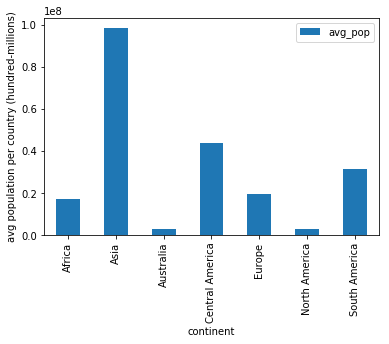

In [23]:
#q21
import matplotlib.pyplot as plt
%matplotlib inline
avg_pop_df
avg_pop_df = avg_pop_df.sort_values(by='continent')
bar_graph = avg_pop_df.plot.bar(x = 'continent')
bar_graph.set_ylabel("avg population per country (hundred-millions)")

Text(0,0.5,'number of countries')

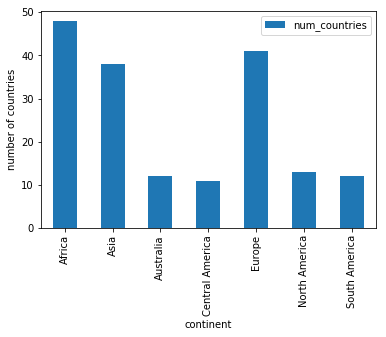

In [24]:
#q22
sorted_countries = num_of_countries.sort_values(by='continent')
graph_num_countries = sorted_countries.plot.bar(x='continent')
graph_num_countries.set_ylabel("number of countries")

Text(0,0.5,'distances to nearest neighbour (miles)')

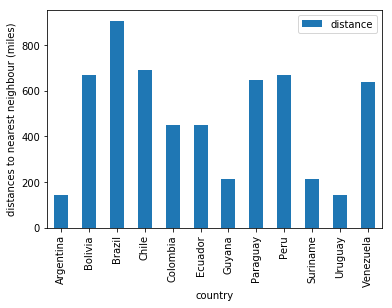

In [25]:
#q23
sorted_list = df_distances.sort_values(by='country')
data_dist = sorted_list.plot.bar()
data_dist.set_ylabel('distances to nearest neighbour (miles)')


Text(0,0.5,'Population(hundred millions)')

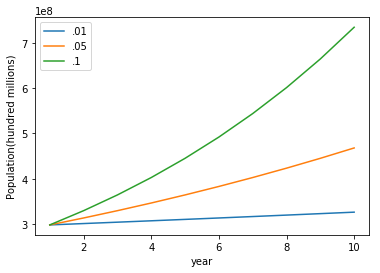

In [26]:
#q24
import numpy as np
import math
us_pop = country_data[country_data['country'] == 'United States']

def predictPopulation(growthRate):
    p1 = 298444215
    r = growthRate
    list_time = []
    for i in range(10):
        list_time.append(p1 * (math.e ** (r * i)))
    return list_time

a = predictPopulation(.01)
b = predictPopulation(.05)
c = predictPopulation(.1)
df_exp_pop = pd.DataFrame({
    "year": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ".01": a,
    ".05": b,
    ".1" : c
})
graph = df_exp_pop.plot.line(x='year')
graph.set_ylabel('Population(hundred millions)')


In [27]:
#q25
country_data.corr()

,area,birth-rate,coastline,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population
area,1.000,-0.108,-0.098,-0.002,0.082,-0.063,0.066,0.065,0.110,0.463
birth-rate,-0.108,1.000,-0.122,0.400,-0.640,0.869,-0.792,-0.086,-0.732,-0.063
coastline,-0.098,-0.122,1.000,-0.121,0.148,-0.157,0.137,0.109,0.289,-0.070
death-rate,-0.002,0.400,-0.121,1.000,-0.210,0.628,-0.343,0.045,-0.254,-0.055
gdp-per-capita,0.082,-0.640,0.148,-0.210,1.000,-0.628,0.518,0.452,0.879,-0.041
infant-mortality,-0.063,0.869,-0.157,0.628,-0.628,1.000,-0.761,-0.033,-0.690,0.001
literacy,0.066,-0.792,0.137,-0.343,0.518,-0.761,1.000,0.002,0.594,-0.037
net-migration,0.065,-0.086,0.109,0.045,0.452,-0.033,0.002,1.000,0.344,-0.004
phones,0.110,-0.732,0.289,-0.254,0.879,-0.690,0.594,0.344,1.000,-0.006
population,0.463,-0.063,-0.070,-0.055,-0.041,0.001,-0.037,-0.004,-0.006,1.000


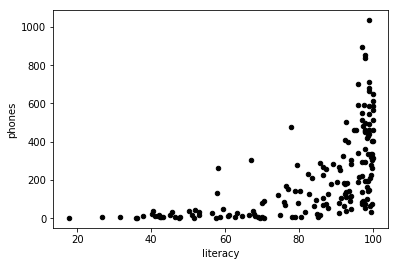

In [28]:
#q26
phones = country_data['phones']
literacy = country_data['literacy']
df_phones_lit = pd.concat([phones, literacy], axis=1)
df_phones_lit
df_phones_lit.plot.scatter(x='literacy', y='phones', c='black')

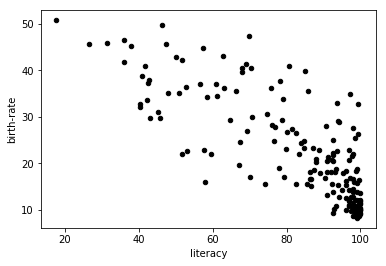

In [29]:
#q27
birth_rate = country_data['birth-rate']
literacy = country_data['literacy']
df_br_lit = pd.concat([literacy, birth_rate], axis =1)
df_br_lit
df_br_lit.plot.scatter(x='literacy', y='birth-rate', c='black')


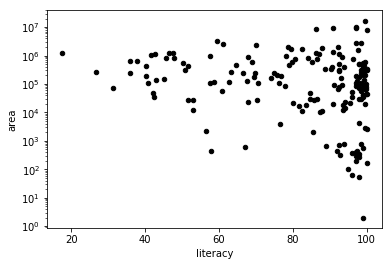

In [30]:
#q28
area = country_data['area']
df_area_lit = pd.concat([area,literacy], axis=1)
df_area_lit.plot.scatter(x='literacy', y='area',logy=True, c='black')

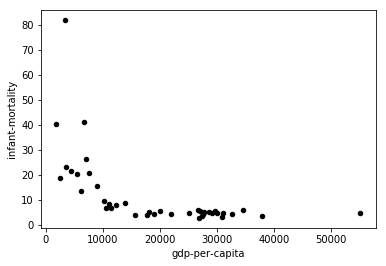

In [31]:
#q29
df_europe = country_data[country_data['continent'] == 'Europe']
inf_mor = df_europe['infant-mortality']
gdp = df_europe['gdp-per-capita']
df_gdp_inf = pd.concat([inf_mor, gdp], axis=1)
df_gdp_inf.plot.scatter(x='gdp-per-capita', y='infant-mortality', c='black')

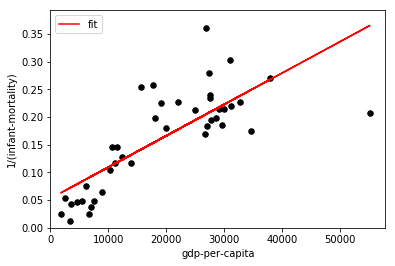

In [32]:
#q30
import numpy as np
inv_inf_mor = 1/(df_europe['infant-mortality'])
df_eur_fit = pd.concat([inv_inf_mor, df_europe['gdp-per-capita']], axis=1)
df_eur_fit = df_eur_fit.rename(index=str, columns={'infant-mortality':'1/(infant-mortality)'})
df_eur_fit["1"] = 1
res = np.linalg.lstsq(df_eur_fit[["gdp-per-capita", "1"]], df_eur_fit['1/(infant-mortality)'], rcond=None)
# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n)
m = coefficients[0] # slope
n = coefficients[1] # intercept
ax = df_eur_fit.plot.scatter(x='gdp-per-capita', y='1/(infant-mortality)', c='black', s=30, xlim=0, ylim=0)
df_eur_fit["fit"] = df_eur_fit["gdp-per-capita"] * m + n
df_eur_fit.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)